<a href="https://colab.research.google.com/github/BagasDwiSantosa/-MyPertaminaUnfaedah/blob/main/1Clustering_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import pandas as pd

# Load Data

In [ ]:
df = pd.read_excel('MyPrep.xlsx')
df

,hasil,DONE
0,butuh ngumpulin uang peduli rakyat berat juang...,butuh ngumpulin uang peduli rakyat berat juang...
1,oversize hoodie polos zipper harga link tag ma...,oversize hoodie polos zipper harga link tag ma...
2,premium jenis bbm om spbu mypertaminaunfaedah ...,premium jenis bbm om spbu mypertaminaunfaedah ...
3,amat aman siber sorot mypertamina parameter da...,amat aman siber sorot mypertamina parameter da...
4,waspada edar aplikasi mypertamina palsu mypert...,waspada edar aplikasi mypertamina palsu mypert...
...,...,...
1810,setrika uap portable rating malaysiamasters my...,setrika uap portable rating malaysiamasters my...
1811,a basic overall rating malaysiamasters myperta...,a basic overall rating malaysiamasters myperta...
1812,dahye floral blouse rating malaysiamasters myp...,dahye floral blouse rating malaysiamasters myp...
1813,cemburu buta enola band enola band bth produse...,cemburu buta enola band enola band bth produse...


# Stopword and Build Models

In [ ]:
documents = df['DONE'].values.astype("U")
stopwords = open('stopwords.txt', 'r').read().split()
vectorizer = TfidfVectorizer(stop_words=stopwords)
features = vectorizer.fit_transform(documents)

k = 10
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

df['cluster'] = model.labels_



C:\Users\asus Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'batas', 'benarnya', 'bener', 'berulang', 'dalamnya', 'dibagi', 'galanya', 'gamblangnya', 'gininya', 'harinya', 'kurangnya', 'menerus', 'mereta', 'merta', 'musabab', 'musababnya', 'napa', 'olah', 'ratanya', 'reka', 'sebenar', 'sedalam', 'segamblang', 'segini', 'segmen', 'sejelas', 'sekurang', 'sempet', 'setidak', 'tama', 'tidaknya', 'yakinnya'] not in stop_words.
  warnings.warn(


In [ ]:
total = df['cluster'].value_counts()
print(total)

0    799
1    438
6    171
7    138
8     69
4     66
5     43
3     42
2     33
9     16
Name: cluster, dtype: int64


# Create CSV and Feature Terms

In [ ]:
clusters = df.groupby('cluster')    

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['hasil']] # get title and overview columns
    f.write(data.to_csv(index=False)) # set index to id
    f.close()

print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

ii_cluster = []
jj_data = []


for i in range(k):
    ii_cluster.append("Cluster %d:" % i)
    for j in order_centroids[i]: #print out 10 feature terms of each cluster
        jj_data.append(' %s' % terms[j])


Cluster centroids: 



C:\Users\asus Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Create TXT 

In [ ]:
with open ("10 cluster.txt", "w", encoding="utf-8") as f:
    for i in range(k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroids[i]:
            f.write (' %s' % terms[ind],)
            f.write("\n")
        f.write("\n\n\n")
        f.write("="*50)
        f.write("\n\n\n")

# Visualisasi Cluster

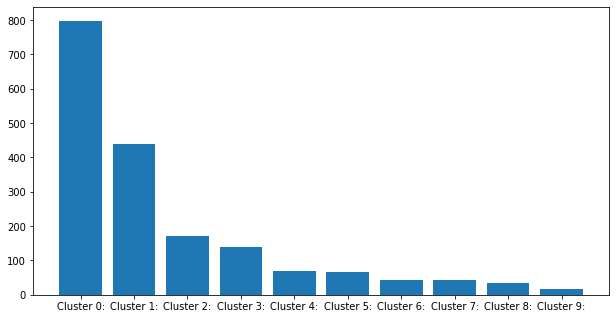

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
Nilai = df['cluster'].value_counts()
ax.bar(ii_cluster,Nilai)
plt.show()

# Visualisasi WordCloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS

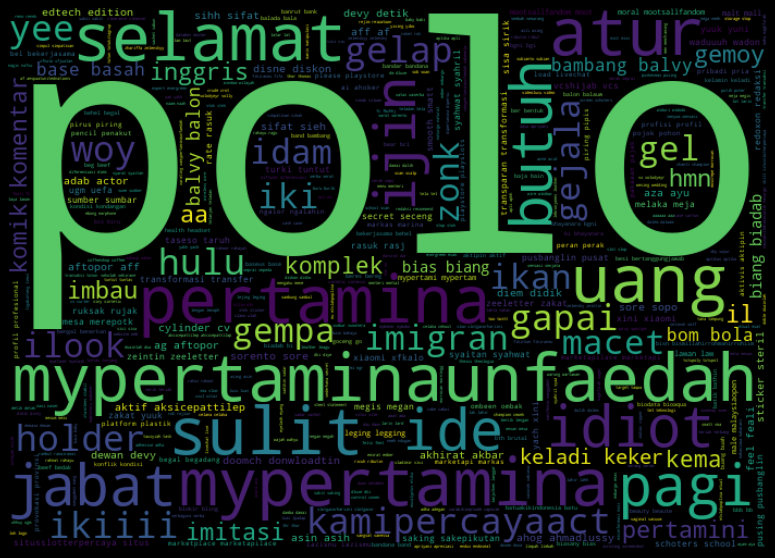

In [ ]:
allWords = ' '.join([twts for twts in jj_data])
wc = WordCloud(background_color="black", max_words=1500,
                stopwords= STOPWORDS, max_font_size=300,
               random_state=42, width=700, height=500)
wc.generate(allWords)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

# Visualisasi Scatter Plot

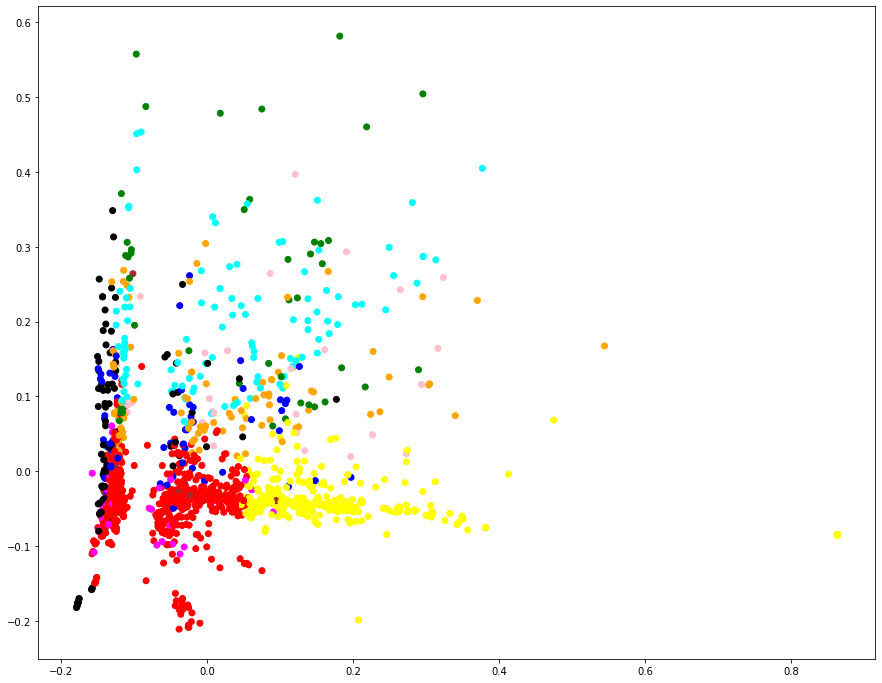

In [ ]:
kmeans_indices = model.fit_predict(features)

pca = PCA(n_components=k)

scatter_plot_points = pca.fit_transform(features.toarray())

colors =['red','blue','cyan','yellow','magenta','green','brown','black','orange','pink']

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(15,12))

ax.scatter(x_axis, y_axis, c=[colors[d]for d in kmeans_indices])

# for i, txt in enumerate(arrayy):
#   ax.annotate(txt[0:5],(x_axis[i], y_axis[i]))

# plt.savefig('10 Cluster.png')

In [ ]:
# df1 = pd.read_csv('cluster0.csv', sep='\t')
# df2 = pd.read_csv('cluster1.csv', sep='\t')
# df3 = pd.read_csv('cluster2.csv', sep='\t')
# df4 = pd.read_csv('cluster3.csv', sep='\t')
# df5 = pd.read_csv('cluster4.csv', sep='\t')
# df6 = pd.read_csv('cluster5.csv', sep='\t')
# df7 = pd.read_csv('cluster6.csv', sep='\t')
# df8 = pd.read_csv('cluster7.csv', sep='\t')
# df9 = pd.read_csv('cluster8.csv', sep='\t')
# df10 = pd.read_csv('cluster9.csv', sep='\t')

In [ ]:
# df1['cluster0'] = df1['hasil']
# df1['cluster1'] = df2['hasil']
# df1['cluster2'] = df3['hasil']
# df1['cluster3'] = df4['hasil']
# df1['cluster4'] = df5['hasil']
# df1['cluster5'] = df6['hasil']
# df1['cluster6'] = df7['hasil']
# df1['cluster7'] = df8['hasil']
# df1['cluster8'] = df9['hasil']
# df1['cluster9'] = df10['hasil']


In [ ]:
# done = df1[['cluster0','cluster1','cluster2', 'cluster3', 'cluster4','cluster5', 'cluster6','cluster7', 'cluster8', 'cluster9']]

In [ ]:
# done

In [ ]:
# done.to_excel('10CCLUSTER.xlsx', index=False)